In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [118]:
#one dataframe
df = pd.read_excel('CaraHittahV2.xlsx', sheet_name=None, ignore_index = False, sort=True)

cdf = pd.concat(df.values())

In [121]:
cdf.head()
cdf.columns = cdf.iloc[1, :]
cdf = cdf.iloc[2:, :]
cdf.head(10)

1,AB,Date,Barrel,Strike Zone Width,BV,POI X,Bat Material,Impact Momentum,Horiz. Angle,nan,Dist,P. Type,Strike Zone Bottom,Pts,Velo,Vertical Distance,Pitch,User,POI Y,Res,Trigger to Impact,nan,nan,nan,nan,nan,nan,nan,Horizontal Distance,Strike Zone Top,Hand Speed,LA,Time Stamp,Strike Zone,nan,POI Z,AA,Type,nan,nan,nan,nan,nan,nan,nan,nan,nan,#,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0,81.1959,5.68493,0,167.222,66.9091,51.8,91.3462,145.963,135.68,132.105,83.1111,108.25,81.7111,83.3152,84.6389,83.48,80.075,79.8816,82.4038,80.46,78.1704,80.46,84.186667,81.75,77.975,77.366667,84.066667,0.30137,-4.8,15.7778,-3.57576,-0.111111,-1.27273,4,12.5526,-0.692308,15.2222,8.8,14.8,3.2,-1.875,18.5,2.666667,23.0,2.63973,28.896164,20.5449,91.7,7.79115,23.4266,NaN,NaN,NaN,NaN,NaN,73.8417,83.213,84.2667,NaN,NaN,NaN,NaN,NaN
1,AB,Date,Barrel,Strike Zone Width,BV,POI X,Bat Material,Impact Momentum,Horiz. Angle,NaN,Dist,P. Type,Strike Zone Bottom,Pts,Velo,Vertical Distance,Pitch,User,POI Y,Res,Trigger to Impact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Horizontal Distance,Strike Zone Top,Hand Speed,LA,Time Stamp,Strike Zone,NaN,POI Z,AA,Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,2018-08-16 18:59:49.111000,0,17,0,-0.44,Undefined,0,-48,Right,8,NaN,22.7,0,56,-7.8,69,TJ Rigaud,25.57,Foul,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,42.1,0,-16,00:13:47.766000,8,-3.3,27.11,0,GB,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,PEAK EV,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RANGE,AVG EV,AVE LA,NaN,NaN,NaN,NaN,NaN
3,22,2018-08-16 19:06:05.982000,0,17,0,1.89,Undefined,0,-30,Right,18,NaN,22.7,0,60.3,-3.6,68.9,TJ Rigaud,30.15,2018-05-03 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.1,42.1,0,-6,00:20:04.637000,8,-2.7,34.27,0,GB,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-45 to -35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,2018-08-16 19:06:38.576000,0,17,0,-3.97,Undefined,0,-24,Right,249,NaN,22.7,75,89.7,-4,69.7,TJ Rigaud,28.97,F7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,42.1,0,16,00:20:37.231000,9,-2.7,23.6,0,LD,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-35 to -25,60.3,-6,NaN,NaN,NaN,NaN,NaN
5,63,2018-08-08 19:53:58.802000,0,17,0,3.12,Undefined,0,-19,Right,35,NaN,21.5,29,87.1,-3.2,76.4,Joey Kassis,29.76,2018-06-03 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.4,40.7,0,-2,00:34:22.267000,4,-2.5,41.65,0,GB,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-25 to -15,86.6667,7.33333,NaN,NaN,NaN,NaN,NaN
6,16,2018-08-13 20:27:42.490000,0,17,0,-4.74,Undefined,0,-18,Right,131,NaN,21.5,39,83.2,-2.4,72.9,Joey Kassis,29.36,F6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,40.7,0,8,00:12:25.845000,6,-2.7,24.66,0,LD,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15 to -5,85.08,1.53333,NaN,NaN,NaN,NaN,NaN
7,59,2018-08-08 19:48:31.204000,0,17,0,-2.94,Undefined,0,-14,Right,37,NaN,21.5,21,84.1,-0.1,75.2,Joey Kassis,31.8,2018-06-03 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,40.7,0,-2,00:28:54.669000,5,-2.3,29.09,0,GB,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5 to 5,83.9,3.38462,NaN,NaN,NaN,NaN,NaN
8,12,2018-08-16 18:58:31.516000,0,17,0,1.21,Undefined,0,-13,Right,10,NaN,22.7,0,79.7,-6.3,69.5,TJ Rigaud,26.02,2018-06-03 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.2,42.1,0,-12,00:12:30.171000,8,-3.2,16.4,0,GB,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 to 15,84.69,-9.8,NaN,NaN,NaN,NaN,NaN
9,11,2018-08-07 17:50:14.331000,0,17,0,1.75,Undefined,0,-13,Right,7,NaN,21.5,0,83.1,0,69.9,Joey Kassis,31.04,2018-06-03 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.8,40.7,0,-21,00:01:40.945000,5,-2.6,16.42,0,GB,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 25,80.5583,15.8333,NaN,NaN,NaN,NaN,NaN


In [126]:
def removefloats(row):
    if type (row.User) == float:
        return "dummy"
    else:
        return(row['User'])

In [94]:
def readdata(filename):
    xlsx = pd.ExcelFile(filename)

#initialize hitters_sheet
    hitters_sheets = []
    nsheet = xlsx.parse(xlsx.sheet_names[0])
    cols = nsheet.iloc[1, :]
    print(nsheet.shape, len(cols))
    nsheet.columns = cols
    nsheet = nsheet.iloc[2:,]
    hitters_sheets.append(nsheet)

    for isheet in range(1, len(xlsx.sheet_names)):
        nsheet = xlsx.parse(xlsx.sheet_names[isheet])
        if nsheet.shape[0] < 2:
            continue
        print(nsheet.shape)
        nsheet = nsheet.iloc[2:, 0:53]
        #nsheet = nsheet.iloc[1:,]
        nsheet.columns = cols
        hitters_sheets.append(nsheet)
    
    hitters = pd.concat(hitters_sheets)
    return(hitters)


In [97]:
dx = readdata('CaraHittahV2.xlsx')
dx.iloc[72:88, :]

(75, 53) 53
(136, 53)
(839, 53)
(191, 53)
(161, 53)
(240, 53)
(234, 53)
(208, 53)
(477, 53)
(253, 53)
(134, 60)
(399, 60)
(1388, 60)
(177, 53)
(180, 53)
(342, 53)
(489, 53)
(203, 53)
(145, 53)
(93, 53)
(736, 53)
(276, 53)
(292, 53)
(241, 53)
(522, 53)
(329, 53)
(459, 53)
(108, 53)
(173, 53)
(189, 53)
(215, 53)
(758, 53)
(380, 53)
(164, 53)
(116, 53)
(334, 53)
(195, 53)
(222, 53)
(183, 53)
(858, 53)
(172, 53)
(274, 53)


1,#,AB,Date,Time Stamp,Pitch,Strike Zone,P. Type,Velo,LA,Dist,Res,Type,Horiz. Angle,Pts,Hand Speed,BV,Trigger to Impact,AA,Impact Momentum,Strike Zone Bottom,Strike Zone Top,Strike Zone Width,Vertical Distance,Horizontal Distance,POI X,POI Y,POI Z,Bat Material,User,nan,nan,nan,Barrel,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
74,47,23,2018-08-16 19:06:15.305000,00:20:13.960000,68.9,9,NaN,61.2,48,190,Foul,FB,74,0,0,0,0,0,0,22.7,42.1,17,-6.8,4,-4.07,25.43,15.09,Undefined,TJ Rigaud,-3.1,Right,Baseball - College,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,2,2018-09-11 19:04:02.821000,00:06:37.313000,75.6,12,NaN,58.8,-36,4,Foul,GB,-89,0,0,0,0,0,0,23.9,43.5,17,-13.1,-6.3,4.94,22.29,37.97,Undefined,Ian McIntyre,-2.9,Right,Baseball - College,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51,10,2018-09-14 18:27:39.401000,00:28:56.747000,70,7,NaN,62.3,-43,5,Foul,GB,-84,0,0,0,0,0,0,23.9,43.5,17,-5.7,-4.2,5.63,31.8,47.64,Undefined,Ian McIntyre,-4.3,Right,Baseball - College,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42,2,25:15.7,57:01.2,66.1,5,NaN,50.1,-68,3,Foul,GB,-67,0,0,0,0,0,0,23.9,43.5,17,-2.4,0.5,-1.05,33.34,28.11,Undefined,Ian McIntyre,-6.5,Right,Baseball - College,0,NaN,PEAK EV,AVG EV,AVE LA,Horizontal_LA_RANGE,NaN,PEAK EV,AVG EV,LA_RANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,12,5,32:18.3,05:14.8,68.5,13,NaN,73.7,-22,7,Foul,GB,-65,0,0,0,0,0,0,23.9,43.5,17,-13.4,4.6,-2.86,24.69,46.55,Undefined,Ian McIntyre,-5.2,Right,Baseball - College,0,NaN,NaN,81.1333,-3.55556,-45 to -35,NaN,NaN,91.9714,-10 to 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,23,3,2018-09-11 19:09:13.760000,00:11:48.252000,74.6,12,NaN,36.4,-39,5,Foul,GB,-63,0,0,0,0,0,0,23.9,43.5,17,-14.7,-5.9,5.02,20.42,31.47,Undefined,Ian McIntyre,-3.4,Right,Baseball - College,0,NaN,NaN,88.275,17.2,-35 to -25,NaN,NaN,90.425,0 to 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,49,6,25:58.9,57:44.3,65.7,8,NaN,72.9,-43,5,Foul,GB,-60,0,0,0,0,0,0,23.9,43.5,17,-3.8,-0.6,-0.05,32.71,32.4,Undefined,Ian McIntyre,-6.2,Right,Baseball - College,0,NaN,NaN,90.5909,19.5,-25 to -15,NaN,NaN,90.6304,10 to 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,33,12,43:29.9,16:26.4,76.1,9,NaN,88.4,14,216,Foul,LD,-54,0,0,0,0,0,0,23.9,43.5,17,-10.1,7.2,-6.58,24.99,31.2,Undefined,Ian McIntyre,-3.3,Right,Baseball - College,0,NaN,NaN,88.4682,21.8182,-15 to -5,NaN,NaN,89.8381,20 to 30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,52,5,22:39.9,23:13.3,64,8,NaN,68,-25,6,Foul,GB,-47,0,0,0,0,0,0,23.9,43.5,17,-4.2,-0.6,1.07,30.48,23.82,Undefined,Ian McIntyre,-5.1,Right,Baseball - College,0,NaN,NaN,88.125,28.4167,-5 to 5,NaN,NaN,79.4333,30 to 40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,23,9,41:05.5,05:54.8,67.3,9,NaN,77.1,-11,10,Foul,GB,-47,0,0,0,0,0,0,23.9,43.5,17,-9.4,5.6,-5.69,24.88,23.17,Undefined,Ian McIntyre,-3.2,Right,Baseball - College,0,NaN,NaN,82.5667,30.7778,5 to 15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
 hx = cdf[[                 'AB',                'Date',              'Barrel',
         'Strike Zone Width',                  'BV',               'POI X',
              'Bat Material',     'Impact Momentum',        'Horiz. Angle',
                                         'Dist',             'P. Type',
        'Strike Zone Bottom',                 'Pts',                'Velo',
         'Vertical Distance',               'Pitch',                'User',
                     'POI Y',                 'Res',   'Trigger to Impact',
                         
                         'Horizontal Distance',     'Strike Zone Top',
                'Hand Speed',                  'LA',          'Time Stamp',
               'Strike Zone',                                  'POI Z',
                        'AA',                'Type',    ]]


In [130]:
hx['User'] = hx.apply(removefloats,axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [131]:
hx = hx[(hx.User!='User') & (hx.User != 'dummy')]
 

In [132]:
hx.head()

1,AB,Date,Barrel,Strike Zone Width,BV,POI X,Bat Material,Impact Momentum,Horiz. Angle,Dist,P. Type,Strike Zone Bottom,Pts,Velo,Vertical Distance,Pitch,User,POI Y,Res,Trigger to Impact,Horizontal Distance,Strike Zone Top,Hand Speed,LA,Time Stamp,Strike Zone,POI Z,AA,Type
2,18,2018-08-16 18:59:49.111000,0,17,0,-0.44,Undefined,0,-48,8,NaN,22.7,0,56,-7.8,69,TJ Rigaud,25.57,Foul,0,0.7,42.1,0,-16,00:13:47.766000,8,27.11,0,GB
3,22,2018-08-16 19:06:05.982000,0,17,0,1.89,Undefined,0,-30,18,NaN,22.7,0,60.3,-3.6,68.9,TJ Rigaud,30.15,2018-05-03 00:00:00,0,-1.1,42.1,0,-6,00:20:04.637000,8,34.27,0,GB
4,24,2018-08-16 19:06:38.576000,0,17,0,-3.97,Undefined,0,-24,249,NaN,22.7,75,89.7,-4,69.7,TJ Rigaud,28.97,F7,0,4.4,42.1,0,16,00:20:37.231000,9,23.6,0,LD
5,63,2018-08-08 19:53:58.802000,0,17,0,3.12,Undefined,0,-19,35,NaN,21.5,29,87.1,-3.2,76.4,Joey Kassis,29.76,2018-06-03 00:00:00,0,-5.4,40.7,0,-2,00:34:22.267000,4,41.65,0,GB
6,16,2018-08-13 20:27:42.490000,0,17,0,-4.74,Undefined,0,-18,131,NaN,21.5,39,83.2,-2.4,72.9,Joey Kassis,29.36,F6,0,4.6,40.7,0,8,00:12:25.845000,6,24.66,0,LD


In [139]:
hx = hx[hx.User.notna()]

In [140]:
hx.sort_values('User')

1,AB,Date,Barrel,Strike Zone Width,BV,POI X,Bat Material,Impact Momentum,Horiz. Angle,Dist,P. Type,Strike Zone Bottom,Pts,Velo,Vertical Distance,Pitch,User,POI Y,Res,Trigger to Impact,Horizontal Distance,Strike Zone Top,Hand Speed,LA,Time Stamp,Strike Zone,POI Z,AA,Type
423,5,56:43.3,1,17,0,6.82,Undefined,0,-18,253,NaN,23.1,108,96.7,-4.4,73.9,Aaron Lopez,29.02,3B-8,0,-7.4,42.6,0,14,21:49.9,7,25.36,0,LD
420,2,25:05.1,0,17,0,0.34,Undefined,0,1,66,NaN,23.1,71,96.5,-5,66.1,Aaron Lopez,28.07,1B-8,0,-0.4,42.6,0,1,00:36.0,8,18.73,0,GB
421,2,56:29.8,0,17,0,1.45,Undefined,0,-10,22,NaN,23.1,60,96.5,-5,64.3,Aaron Lopez,28.25,1B-8,0,-1.3,42.6,0,-5,00:34.9,8,20.06,0,GB
422,6,42:18.8,1,17,0,-5.77,Undefined,0,-14,213,NaN,23.1,100,96.5,-6,65.5,Aaron Lopez,28.96,2B-8,0,5.4,42.6,0,11,00:28.3,9,30.21,0,LD
424,41,34:44.6,0,17,0,4.88,Undefined,0,-27,181,NaN,23.1,92,96.7,-6,66.7,Aaron Lopez,28.59,1B-7,0,-6.1,42.6,0,9,32:42.0,7,29.36,0,LD
425,4,20:24.9,1,17,0,3.56,Undefined,0,-5,350,NaN,23.1,120,96.8,-8.9,78.2,Aaron Lopez,24.43,3B-8,0,-3.6,42.6,0,23,14:44.1,7,22.32,0,LD
426,2,35:37.2,0,17,0,-0.93,Undefined,0,-13,208,NaN,23.1,100,96.9,-11.5,66.6,Aaron Lopez,23.3,2B-8,0,1.5,42.6,0,10,00:43.7,13,29.8,0,LD
427,6,04:48.5,0,17,0,-0.7,Undefined,0,-27,16,NaN,23.1,56,96.9,-4.1,77.8,Aaron Lopez,29.22,1B-7,0,0.8,42.6,0,-8,12:44.7,8,23.38,0,GB
428,14,23:57.6,0,17,0,2.36,Undefined,0,-19,17,NaN,23.1,54,96.9,-9.7,68.2,Aaron Lopez,24.89,2018-06-03 00:00:00,0,-1.9,42.6,0,-6,31:53.8,8,28.34,0,GB
429,1,56:33.5,0,17,0,2.32,Undefined,0,-7,173,NaN,23.1,92,96.9,-3.1,75.2,Aaron Lopez,30.12,1B-8,0,-2.2,42.6,0,8,00:38.5,5,20.75,0,LD


In [141]:
maxdutto = hx2[hx2.User == 'Max Dutto']

In [142]:
maxdutto.sample(7)

1,AB,Date,Barrel,Strike Zone Width,BV,POI X,Bat Material,Impact Momentum,Horiz. Angle,Dist,P. Type,Strike Zone Bottom,Pts,Velo,Vertical Distance,Pitch,User,POI Y,Res,Trigger to Impact,Horizontal Distance,Strike Zone Top,Hand Speed,LA,Time Stamp,Strike Zone,POI Z,AA,Type
110,16,2018-09-15 22:46:52.770000,1,17,0,-1.5,Undefined,0,-15,285,NaN,23.1,82,92.5,-3.2,71.8,Max Dutto,30.35,2B-8,0,1.2,42.6,0,18,01:04:04.334000,5,22.48,0,LD
119,4,31:58.6,0,17,0,-1.09,Undefined,0,35,313,NaN,21.5,50,83.8,-1.3,73.8,Max Dutto,30.91,F9,0,0.8,40.7,0,30,09:22.6,5,32.21,0,FB
121,1,2018-09-18 17:57:30.720000,1,17,0,10.46,Undefined,0,25,385,NaN,23.1,100,94.6,-5.3,74.4,Max Dutto,28.91,HR,0,-11.4,42.6,0,31,00:04:53.578000,12,32.42,0,FB
97,7,2018-09-18 18:08:19.547000,1,17,0,1.17,Undefined,0,23,376,NaN,23.1,73,91,-7.9,75.7,Max Dutto,26.99,2B-9,0,-2.2,42.6,0,40,00:15:42.405000,8,38.51,0,FB
143,17,2018-09-15 22:22:47.686000,1,17,0,0.25,Undefined,0,10,239,NaN,23.1,93,98.6,-6.7,78.6,Max Dutto,26.49,2B-8,0,-0.3,42.6,0,12,00:39:59.250000,8,21.15,0,LD
117,8,2018-09-15 22:06:54.483000,0,17,0,-1.98,Undefined,0,-8,177,NaN,23.1,66,93.8,-5.7,74,Max Dutto,26.88,1B-8,0,2,42.6,0,9,00:24:06.047000,8,13.84,0,LD
65,6,2018-09-15 22:39:28.820000,0,17,0,3.53,Undefined,0,29,195,NaN,23.1,47,84.9,-15.4,70.5,Max Dutto,19.62,1B-9,0,-4.3,42.6,0,13,00:56:40.384000,12,30.76,0,LD


In [143]:
def norm(x):
    return (x/x.max())



In [144]:
x = maxdutto.groupby(['Type']).count()
x

1,AB,Date,Barrel,Strike Zone Width,BV,POI X,Bat Material,Impact Momentum,Horiz. Angle,Dist,P. Type,Strike Zone Bottom,Pts,Velo,Vertical Distance,Pitch,User,POI Y,Res,Trigger to Impact,Horizontal Distance,Strike Zone Top,Hand Speed,LA,Time Stamp,Strike Zone,POI Z,AA
Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FB,52,52,52,52,52,52,52,52,52,52,0,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
GB,34,34,34,34,34,34,34,34,34,34,0,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
LD,58,58,58,58,58,58,58,58,58,58,0,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58


In [145]:
x.iloc[2,0]

58

In [146]:
x.iloc[:,0].sum()

144

In [147]:
overallhitting = x.iloc[2,0]/x.iloc[:,0].sum()

In [148]:
overallhitting

0.4027777777777778

In [149]:
zlist = maxdutto['Strike Zone'].unique().tolist()
zlist = zlist.sort()

In [150]:
p = pd.DataFrame()

In [151]:
p.shape

(0, 0)

In [152]:
def hittingbyzone(df, zone):
     
    dfx = df[df['Strike Zone']== zone]
    
    if dfx.shape[0] == 0:
        gb = 0
        ld = 0
        fb = 0
        return fb, gb, ld
    dfx = dfx.groupby(['Type']).count()
    y = dfx.shape
    s = dfx.iloc[:, 0].sum()
    if y[0] < 2:
        gb = 0
    else:
        gb = dfx.iloc[1,0]/s
    if y[0] < 3:
        ld = 0
    else:             
        ld = dfx.iloc[2,0]/s
    fb = dfx.iloc[0,0]/s
    
    return fb, gb, ld



In [153]:
maxdutto['Strike Zone']

2      12
3       8
4      13
5      13
6       8
7       5
8       5
9       7
10      8
11      5
12      8
13     12
14      5
15      4
16      4
17      5
18      5
19      9
20      8
21      7
22     12
23      5
24      7
25     12
26      5
27      5
28      8
29      7
30      5
31      2
32      5
33      9
34      6
35      8
36      9
37      8
38      5
39     12
40      4
41      8
42      5
43     12
44     13
45      4
46      5
47      2
48     13
49      5
50      8
51      7
52      8
53     12
54     12
55      9
56     12
57      5
58      8
59      7
60      4
61      7
62      7
63      5
64      8
65     12
66      6
67      7
68      2
69      8
70      9
71      6
72      9
73      4
74      5
75      8
76      9
77     13
78      7
79      8
80      7
81      8
82      4
83      7
84      8
85      5
86      7
87      6
88      8
89      6
90      8
91      7
92      5
93      8
94      9
95      7
96      9
97      8
98      8
99      8
100     8
101     8


In [154]:
hittingbyzone(maxdutto, 1)

(0, 0, 0)

In [155]:

zlist = maxdutto['Strike Zone'].unique().tolist()
zlist.sort()
zlist

[2, 4, 5, 6, 7, 8, 9, 12, 13]

In [156]:
for i in zlist:
    f, g, l = hittingbyzone(maxdutto, i)
    print('Zone ->', i, 'fb%->', f, 'gb%->', g, 'ld%->', l)

Zone -> 2 fb%-> 0.6666666666666666 gb%-> 0.3333333333333333 ld%-> 0
Zone -> 4 fb%-> 0.6363636363636364 gb%-> 0.18181818181818182 ld%-> 0.18181818181818182
Zone -> 5 fb%-> 0.56 gb%-> 0.04 ld%-> 0.4
Zone -> 6 fb%-> 0.42857142857142855 gb%-> 0.42857142857142855 ld%-> 0.14285714285714285
Zone -> 7 fb%-> 0.391304347826087 gb%-> 0.2608695652173913 ld%-> 0.34782608695652173
Zone -> 8 fb%-> 0.2222222222222222 gb%-> 0.24444444444444444 ld%-> 0.5333333333333333
Zone -> 9 fb%-> 0.3333333333333333 gb%-> 0.08333333333333333 ld%-> 0.5833333333333334
Zone -> 12 fb%-> 0.16666666666666666 gb%-> 0.4166666666666667 ld%-> 0.4166666666666667
Zone -> 13 fb%-> 0.16666666666666666 gb%-> 0.6666666666666666 ld%-> 0.16666666666666666


In [157]:
maxdutto.groupby('Strike Zone').Velo.agg(my_mean)

NameError: name 'my_mean' is not defined

In [158]:
maxdutto.groupby('Strike Zone').Velo.max()


Strike Zone
2     85.8
4     93.7
5     96.6
6     95.4
7     98.8
8     98.6
9     96.9
12    94.6
13    91.7
Name: Velo, dtype: float64

In [159]:
maxdutto.groupby('Strike Zone').Velo.min()

Strike Zone
2     75.4
4     69.8
5     60.3
6     76.2
7     63.3
8     47.2
9     71.4
12    30.8
13    56.1
Name: Velo, dtype: float64

In [160]:
def velobyzone(df, zone):
    dfx = df[df['Strike Zone']== zone]
    s = dfx.Velo.sum()
    c = dfx.Velo.count()
    a = s/c
    m = dfx.Velo.max()
    n = dfx.Velo.min()
    return a, m, n
    

In [161]:
velobyzone(maxdutto, 9)

(86.075, 96.9, 71.4)

In [162]:
for i in zlist:
    x, y, z = velobyzone(maxdutto, i)
    print(i, x, y, z)
        

2 80.73333333333333 85.8 75.4
4 84.42727272727274 93.7 69.8
5 79.40399999999998 96.6 60.3
6 88.07142857142857 95.4 76.2
7 86.73913043478261 98.8 63.3
8 87.41333333333333 98.6 47.2
9 86.075 96.9 71.4
12 77.05833333333334 94.6 30.8
13 75.83333333333333 91.7 56.1


In [163]:
hx2 = hx2.rename(index=str,columns={'POI X':'X','POI Y':'Y'})
    

In [164]:
def homeplate():
    plt.figure(figsize=(8,12),dpi=80)
    plt.xlim(-18,18)
    plt.ylim(0,60)

    xmin = -8.5
    xmax = 8.5
    ymin = 23.1
    ymax = 44.6
    deltax = (xmax-xmin)/3
    deltay = (ymax-ymin)/3

    xtick = [xmin, xmin+deltax, xmin+(2*deltax), xmax]
    ytick = [ymin, ymin+deltay, ymin+(2*deltay), ymax]

    X1 = np.linspace(xmin,xmax,4)
    Y1 = np.linspace(ymin,ymax,4)
    Y2 = np.linspace(ymin,ymin,4)
    X2 = np.linspace(xmin,xmin,4)
    X3 = np.linspace(xmax,xmax,4)
    Y3 = np.linspace(ymax,ymax,4)


    X4 = np.linspace(xtick[1],xtick[1],4)
    X5 = np.linspace(xtick[2],xtick[2],4)
    Y4 = np.linspace(ytick[1],ytick[1],4)
    Y5 = np.linspace(ytick[2],ytick[2],4)


    plt.plot(X1,Y2,c='black')
    plt.plot(X2,Y1,c='black')
    plt.plot(X1,Y3,c='black')
    plt.plot(X3,Y1,c='black')


    plt.plot(X4,Y1,c='black',linestyle= '--')
    plt.plot(X5,Y1,c='black',linestyle= '--')
    plt.plot(X1,Y4,c='black',linestyle= '--')
    plt.plot(X1,Y5,c='black',linestyle= '--')

def analyze(hx2,username,date1,date2,v1,v2):
    hnew = hx2[hx2.User == username]
    
    Vmax = 90
    Vlow = 83
   
    LAopt1 = 10
    LAopt2 = 30
    LAbad = 0
    
    
    homeplate()
    #plt.scatter(hnew.X,hnew.Y)
    #h1 = hnew[(hnew.LA<5)]
    h0  = hnew[(hnew.LA>10)&(hnew.LA < 30)]
    h00 = h0[h0.Velo >= 90]
    h01 = h0[(h0.Velo <90) & (h0.Velo >83)]
    h02 = h0[h0.Velo <= 83]
    
    h1 = hnew[(hnew.LA > 0) & (hnew.LA <10)]
    h10 = h1[h1.Velo>=90]
    h11 = h1[(h1.Velo>83) & (h1.Velo <90)]
    h12 = h1[h1.Velo< 83]
    
    h2 = hnew[hnew.LA < 0]
    h20 = h2[h2.Velo >= 90]
    h21 = h2[(h2.Velo > 83) & (h2.Velo <90)]
    h22 = h2[h2.Velo <= 83]
    
    h3 = hnew[hnew.LA > 30]
    h30 = h3[h3.Velo >= 90]
    h31 = h3[(h3.Velo > 83) & (h3.Velo <90)]
    h32 = h3[h3.Velo <= 83]
    
    #x = hnew.X
    #y=hnew.Y
    plt.scatter(h00.X,h00.Y, c='darkgreen',s=30, label='EV>90, LA 10-30')
    plt.scatter(h01.X, h01.Y, c ='green',s=30,marker='*', label='EV 83-90, LA 10-30')
    plt.scatter(h02.X, h02.Y, c='limegreen', s=30, marker='v', label='EV<83, LA10-30')
     
    plt.scatter(h10.X,h10.Y, c='darkblue',s=30, label='EV>90, LA 0-10')
    plt.scatter(h11.X, h11.Y, c ='mediumblue',s=30,marker='*', label='EV 83-90, LA 0-10')
    plt.scatter(h12.X, h12.Y, c='blue', s=30, marker='v', label='EV<83, LA 0=10') 
    
    plt.scatter(h20.X,h20.Y, c='red',s=30, label='EV>90, LA <0')
    plt.scatter(h21.X, h21.Y, c ='darkred',s=30,marker='*', label='EV 83-90, LA <0')
    plt.scatter(h22.X, h22.Y, c='orangered', s=30, marker='v', label='EV<83, LA <0') 
    
    plt.scatter(h30.X,h30.Y, c='magenta',s=30, label='EV>90, LA >30')
    plt.scatter(h31.X, h31.Y, c ='fuchsia',s=30,marker='*', label='EV 83-90, LA >30')
    plt.scatter(h32.X, h32.Y, c='orchid', s=30, marker='v', label='EV<83, LA >30')
    
    plt.xlabel('Horizontal Location' )
    plt.ylabel('Vertical Location')
    plt.title(username)
    
    #return hnew
    plt.legend()


In [165]:
hx2.User

2             TJ Rigaud
3             TJ Rigaud
4             TJ Rigaud
5           Joey Kassis
6           Joey Kassis
7           Joey Kassis
8             TJ Rigaud
9           Joey Kassis
10          Joey Kassis
11          Joey Kassis
12            TJ Rigaud
13          Joey Kassis
14          Joey Kassis
15            TJ Rigaud
16            TJ Rigaud
17            TJ Rigaud
18            TJ Rigaud
19          Joey Kassis
20            TJ Rigaud
21            TJ Rigaud
22          Joey Kassis
23          Joey Kassis
24            TJ Rigaud
25          Joey Kassis
26          Joey Kassis
27            TJ Rigaud
28          Joey Kassis
29          Joey Kassis
30          Joey Kassis
31          Joey Kassis
32          Joey Kassis
33          Joey Kassis
34          Joey Kassis
35          Joey Kassis
36          Joey Kassis
37          Joey Kassis
38            TJ Rigaud
39          Joey Kassis
40          Joey Kassis
41          Joey Kassis
42          Joey Kassis
43          Joey

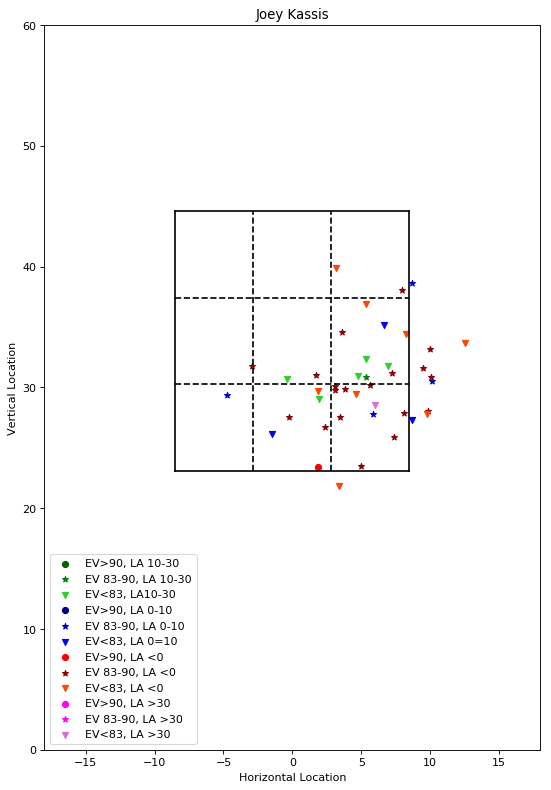

In [167]:
analyze(hx2,'Joey Kassis','11/22/18','12/3/18',60,90)

In [ ]:
hx2.head()

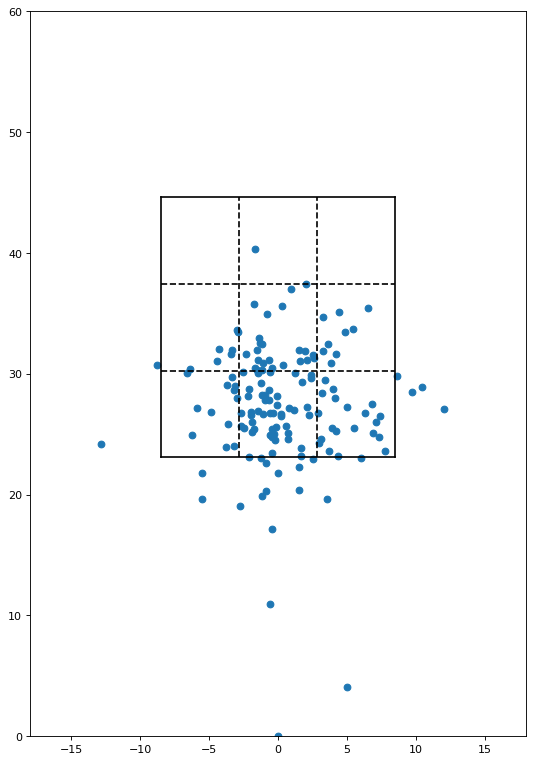

In [168]:
homeplate()
plt.scatter(maxdutto['POI X'],  maxdutto['POI Y'])

In [ ]:
analyze(hx2, 'Nate Clow', 44,55, 60, 90)